<a href="https://colab.research.google.com/github/glitchyguy101/Basic-Machine-Learning/blob/main/wine_reviwe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [126]:
df = pd.read_csv("wine-reviews.csv", usecols = ["country", "description", "points", "price", "variety", "winery"])

In [127]:
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [128]:
df = df.dropna(subset = ["description", "points"])

In [129]:
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


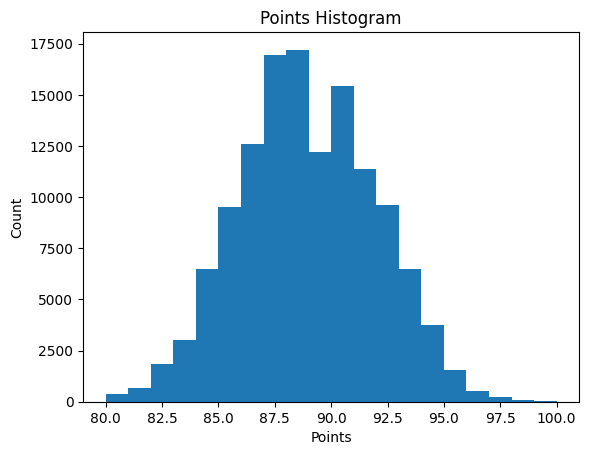

In [130]:
plt.hist(df["points"], bins = 20)
plt.title("Points Histogram")
plt.ylabel("Count")
plt.xlabel("Points")
plt.show()

In [131]:
df["label"] = (df.points>= 90).astype(int)
df = df[['description', 'label']]

In [132]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [133]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
    df = dataframe.copy()
    labels = df.pop('label')
    df = df["description"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
   # ds = tf.cast(ds, tf.string)
    return ds

In [134]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [135]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer= hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [136]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.4674242 , -0.3083908 ,  0.09259078, ..., -0.18576217,
        -0.54970956, -0.11722852],
       [ 0.39457357, -0.27868685,  0.17093508, ..., -0.01961616,
        -0.2060096 ,  0.14222087],
       [ 0.4625585 , -0.31744596, -0.04659696, ...,  0.0674356 ,
        -0.29179853, -0.08102801],
       ...,
       [ 0.40575987, -0.32734692, -0.05704015, ..., -0.10745788,
        -0.02496245,  0.05821534],
       [ 0.2335448 , -0.17047885, -0.03710258, ...,  0.00306768,
        -0.22820458, -0.0526659 ],
       [ 0.38268107, -0.15807594, -0.03672038, ...,  0.0024254 ,
         0.04886236, -0.05522526]], dtype=float32)>

In [137]:
print(type(embedding))

<class 'str'>


In [138]:
print(type(train_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


##Given in Tutorial

In [139]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x78153af8acc0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

In [ ]:
model.evaluate(valid_data)

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

In [ ]:
model.evaluate(test_data)

#This worked but unable to compile

In [140]:
import tensorflow as tf
import tensorflow_hub as hub

# --- 1. Define the hub_layer ---
hub_layer = hub.KerasLayer(
    "https://tfhub.dev/google/nnlm-en-dim50/2",
    dtype=tf.string,
    trainable=True
)

# --- 2. Create a WRAPPER MODEL for the hub_layer ---
# This is the key fix for the ValueError
class HubModel(tf.keras.Model):
    def __init__(self, hub_layer):
        super(HubModel, self).__init__()
        self.hub_layer = hub_layer

    def call(self, inputs):
        return self.hub_layer(inputs)

# Instantiate the wrapper model
wrapped_hub_layer = HubModel(hub_layer)

# --- 3. Build the final Sequential model ---
# Now, we pass the Keras Model (wrapped_hub_layer) which is accepted without type errors.
model = tf.keras.Sequential([
    wrapped_hub_layer, # <-- Use the Keras Model wrapper here
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [141]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])

In [142]:
model.evaluate(train_data)

TypeError: Exception encountered when calling HubModel.call().

[1mCould not automatically infer the output shape / dtype of 'hub_model_4' (of type HubModel). Either the `HubModel.call()` method is incorrect, or you need to implement the `HubModel.compute_output_spec() / compute_output_shape()` method. Error encountered:

Exception encountered when calling layer 'keras_layer_16' (type KerasLayer).

Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(None,), dtype=tf.float32, name=None) to TensorSpec(shape=(None,), dtype=tf.string, name=None)`. Received args: (<tf.Tensor 'Placeholder:0' shape=(None,) dtype=float32>,) and kwargs: {} for signature: (sentences: TensorSpec(shape=(None,), dtype=tf.string, name=None)).

Call arguments received by layer 'keras_layer_16' (type KerasLayer):
  • inputs=tf.Tensor(shape=(None,), dtype=float32)
  • training=None[0m

Arguments received by HubModel.call():
  • args=('<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_20>',)
  • kwargs=<class 'inspect._empty'>

# tryed to type-cast the train_data type

In [143]:
# Ensure train_data yields tf.string for the description before evaluation
train_data_casted = train_data.map(lambda text, label: (tf.cast(text, tf.string), label), num_parallel_calls=tf.data.AUTOTUNE)
model.evaluate(train_data_casted)

TypeError: Exception encountered when calling HubModel.call().

[1mCould not automatically infer the output shape / dtype of 'hub_model_4' (of type HubModel). Either the `HubModel.call()` method is incorrect, or you need to implement the `HubModel.compute_output_spec() / compute_output_shape()` method. Error encountered:

Exception encountered when calling layer 'keras_layer_16' (type KerasLayer).

Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(None,), dtype=tf.float32, name=None) to TensorSpec(shape=(None,), dtype=tf.string, name=None)`. Received args: (<tf.Tensor 'Placeholder:0' shape=(None,) dtype=float32>,) and kwargs: {} for signature: (sentences: TensorSpec(shape=(None,), dtype=tf.string, name=None)).

Call arguments received by layer 'keras_layer_16' (type KerasLayer):
  • inputs=tf.Tensor(shape=(None,), dtype=float32)
  • training=None[0m

Arguments received by HubModel.call():
  • args=('<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_20>',)
  • kwargs=<class 'inspect._empty'>

#New model with sequential API
BTW, I may be wrong , but it worked

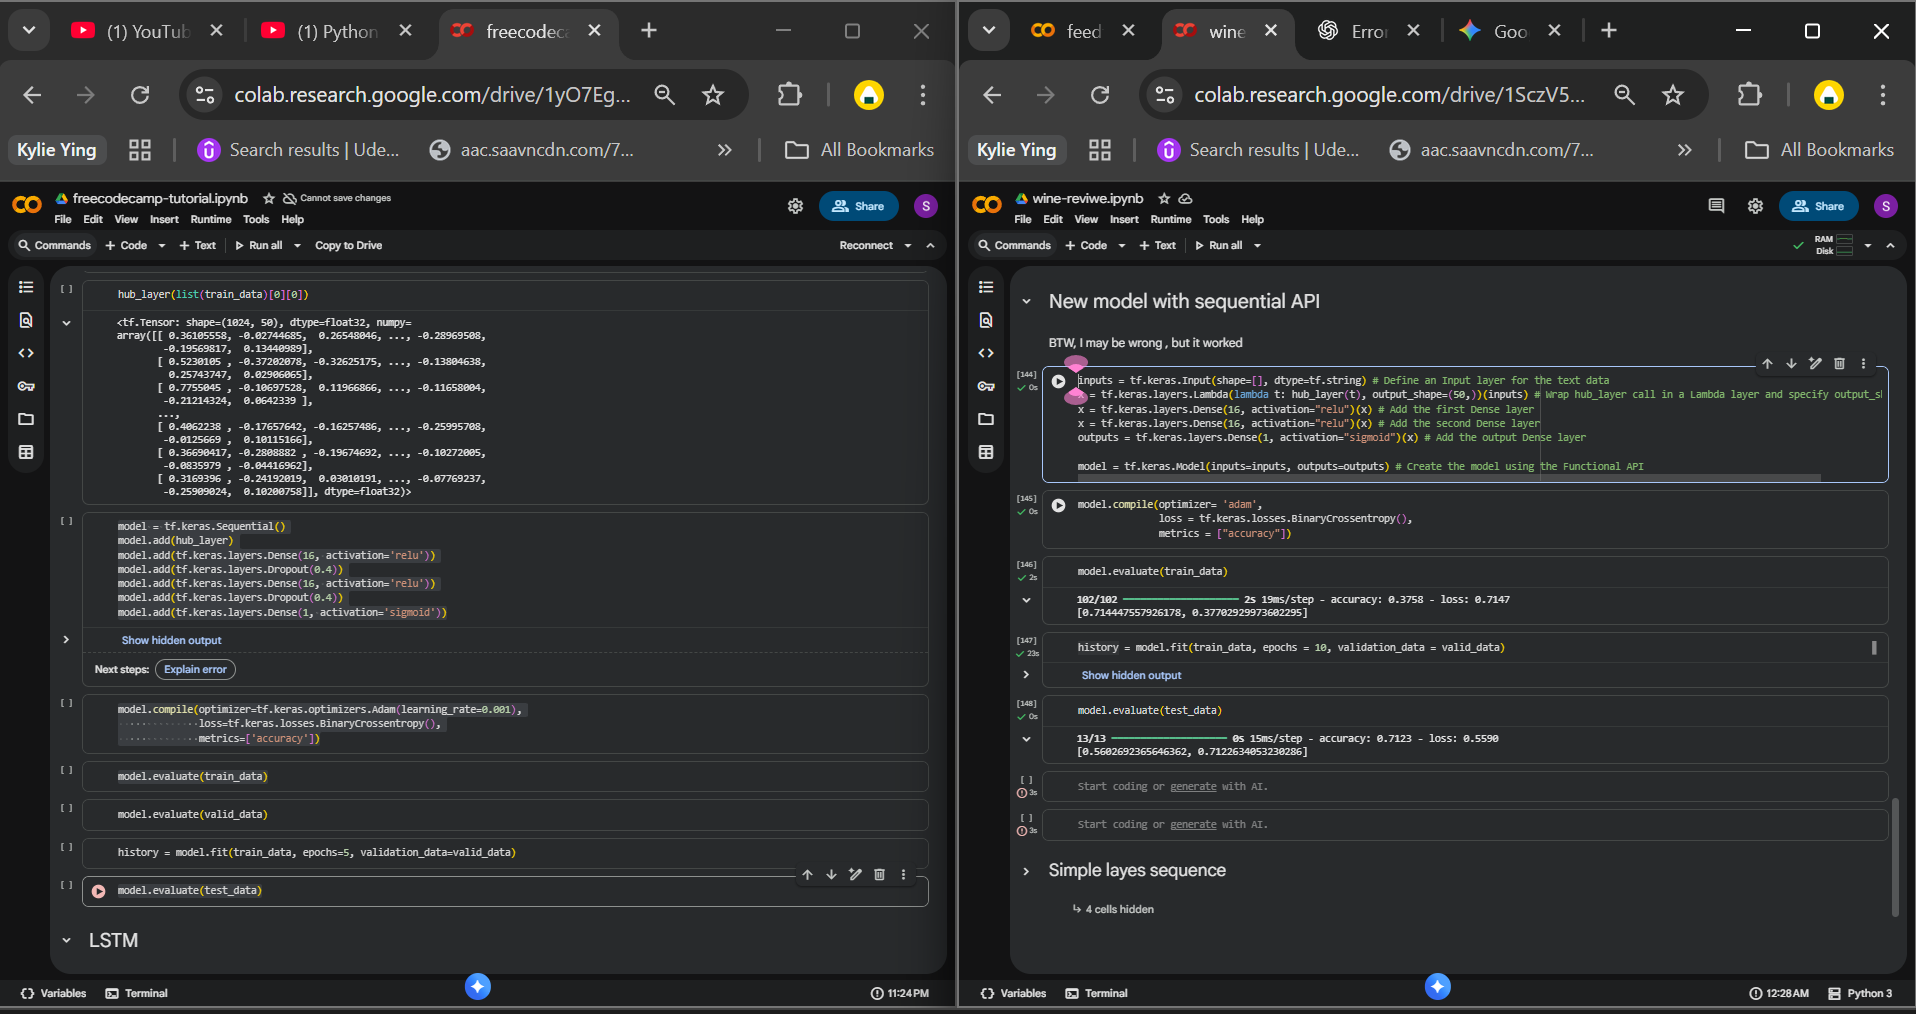

In [144]:
inputs = tf.keras.Input(shape=[], dtype=tf.string) # Define an Input layer for the text data
x = tf.keras.layers.Lambda(lambda t: hub_layer(t), output_shape=(50,))(inputs) # Wrap hub_layer call in a Lambda layer and specify output_shape
x = tf.keras.layers.Dense(16, activation="relu")(x) # Add the first Dense layer
x = tf.keras.layers.Dense(16, activation="relu")(x) # Add the second Dense layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x) # Add the output Dense layer

model = tf.keras.Model(inputs=inputs, outputs=outputs) # Create the model using the Functional API

In [145]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])

In [146]:
model.evaluate(train_data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3758 - loss: 0.7147


[0.714447557926178, 0.37702929973602295]

In [147]:
history = model.fit(train_data, epochs = 10, validation_data = valid_data)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5394 - loss: 0.6837 - val_accuracy: 0.6444 - val_loss: 0.6390
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6585 - loss: 0.6246 - val_accuracy: 0.6827 - val_loss: 0.5951
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6888 - loss: 0.5877 - val_accuracy: 0.6941 - val_loss: 0.5800
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6999 - loss: 0.5743 - val_accuracy: 0.6994 - val_loss: 0.5741
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7048 - loss: 0.5671 - val_accuracy: 0.7017 - val_loss: 0.5715
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7065 - loss: 0.5656 - val_accuracy: 0.7025 - val_loss: 0.5711
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7071 - loss: 0.5657 - val_accuracy: 0.7049 - val_loss: 0.5691
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7078 - loss: 0.5636 - val_accu

In [148]:
model.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7123 - loss: 0.5590


[0.5602692365646362, 0.7122634053230286]

##Simple layes sequence

In [ ]:
model = tf.keras.Sequential(
    [
        hub_layer,
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [151]:
import tensorflow as tf
import tensorflow_hub as hub

# --- 1. Define the hub_layer ---
# This layer uses the NNLM text embedding model from TensorFlow Hub.
# dtype=tf.string is essential as it expects raw text input.
hub_layer = hub.KerasLayer(
    "https://tfhub.dev/google/nnlm-en-dim50/2",
    dtype=tf.string,
    trainable=True
)

# --- 2. Define the Sequential Model with the Lambda wrapper ---
# We use Lambda to ensure the hub_layer is correctly integrated and passes type checking.
model = tf.keras.Sequential(
    [
        # The Lambda layer wraps the hub_layer call, defining the input/output contract.
        tf.keras.layers.Lambda(
            lambda t: hub_layer(t), # Calls the hub_layer on the input tensor 't'
            input_shape=[],         # Input is a single scalar string (e.g., a sentence)
            dtype=tf.string,        # Input data type must be string
            output_shape=[50]       # Output shape is 50 dimensions (from the NNLM model)
        ),

        # The subsequent Dense layers for classification
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),

        # Output layer for binary classification
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# --- 3. Compile the Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

TypeError: Exception encountered when calling Lambda.call().

[1mcan only concatenate tuple (not "TrackedList") to tuple[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None,), dtype=string, sparse=False, ragged=False, name=keras_tensor_29>',)
  • kwargs={'mask': 'None'}

In [152]:
import tensorflow as tf
import tensorflow_hub as hub

# --- 1. Define the hub_layer ---
hub_layer = hub.KerasLayer(
    "https://tfhub.dev/google/nnlm-en-dim50/2",
    dtype=tf.string, # Crucial: Expects raw text strings
    trainable=True
)

# --- 2. Define the Model using the Functional API ---

# Define the explicit input layer (necessary for string input)
inputs = tf.keras.Input(shape=[], dtype=tf.string, name='text_input')

# Call the hub_layer directly on the input tensor
# Note: In the Functional API, the layer call is simpler and avoids the Lambda-related TypeError.
x = hub_layer(inputs)

# Add the first Dense layer
x = tf.keras.layers.Dense(16, activation="relu")(x)

# Add the second Dense layer
x = tf.keras.layers.Dense(16, activation="relu")(x)

# Define the output layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Create the final Model object
model = tf.keras.Model(inputs=inputs, outputs=outputs)


# --- 3. Compile the Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

TypeError: Exception encountered when calling layer 'keras_layer_20' (type KerasLayer).

Binding inputs to tf.function failed due to `A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
`. Received args: (<KerasTensor shape=(None,), dtype=string, sparse=False, ragged=False, name=text_input>,) and kwargs: {} for signature: (sentences: TensorSpec(shape=(None,), dtype=tf.string, name=None)).

Call arguments received by layer 'keras_layer_20' (type KerasLayer):
  • inputs=<KerasTensor shape=(None,), dtype=string, sparse=False, ragged=False, name=text_input>
  • training=None